In [1]:
home = "/home/sagemaker-user"

In [2]:
train_path = f"{home}/user-default-efs/fiftyone/open-images-v7/train/data"
validation_path = f"{home}/user-default-efs/fiftyone/open-images-v7/validation/data"

In [3]:
import pandas as pd

In [4]:
df_validation = pd.read_csv(f'{home}/user-default-efs/fiftyone/open-images-v7/validation/labels/detections.csv')

In [5]:
df_validation.head()

ImageID  Source LabelName  Confidence      XMin      XMax  \
0  0001eeaf4aed83f9  xclick  /m/0cmf2           1  0.022673  0.964201   
1  000595fe6fee6369  xclick  /m/02wbm           1  0.000000  1.000000   
2  000595fe6fee6369  xclick  /m/02xwb           1  0.141384  0.179676   
3  000595fe6fee6369  xclick  /m/02xwb           1  0.213549  0.253314   
4  000595fe6fee6369  xclick  /m/02xwb           1  0.232695  0.288660   

       YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
0  0.071038  0.800546           0            0          0            0   
1  0.000000  1.000000           0            0          1            0   
2  0.676275  0.731707           0            0          0            0   
3  0.299335  0.354767           1            0          0            0   
4  0.490022  0.545455           1            0          0            0   

   IsInside  
0         0  
1         0  
2         0  
3         0  
4         0

In [6]:
df_train = pd.read_csv(f"{home}/user-default-efs/fiftyone/open-images-v7/train/labels/detections.csv")

In [7]:
df_train.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  000002b66c9c498e  xclick  /m/01g317           1  0.012500  0.195312   
1  000002b66c9c498e  xclick  /m/01g317           1  0.025000  0.276563   
2  000002b66c9c498e  xclick  /m/01g317           1  0.151562  0.310937   
3  000002b66c9c498e  xclick  /m/01g317           1  0.256250  0.429688   
4  000002b66c9c498e  xclick  /m/01g317           1  0.257812  0.346875   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.148438  0.587500           0            1  ...            0         0   
1  0.714063  0.948438           0            1  ...            0         0   
2  0.198437  0.590625           1            0  ...            0         0   
3  0.651563  0.925000           1            0  ...            0         0   
4  0.235938  0.385938           1            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.148438  0.012500  0.059375  0.195312  0.148438  0.357812  0.587500   
1  0.025000  0.248438  0.276563  0.214062  0.914062  0.714063  0.782813   
2  0.243750  0.151562  0.310937  0.262500  0.198437  0.434375  0.507812   
3  0.315625  0.429688  0.256250  0.423438  0.651563  0.921875  0.826562   
4  0.317188  0.257812  0.346875  0.307812  0.235938  0.289062  0.348438   

   XClick4Y  
0  0.325000  
1  0.948438  
2  0.590625  
3  0.925000  
4  0.385938  

[5 rows x 21 columns]

In [8]:
len(df_train)

14610229

In [9]:
len(df_validation)

303980

In [10]:
data_path_validation = f"{validation_path}/*.jpg"
data_path_train = f"{train_path}/*.jpg"

In [11]:
import glob
counter = 0

img_paths = data_path_train
folder = glob.glob(img_paths)

for i in folder:
    counter +=1
print(counter)

517


In [12]:
import glob
counter = 0

img_paths = data_path_validation
folder = glob.glob(img_paths)

for i in folder:
    counter +=1
print(counter)

9


In [13]:
# get the image ids

train_list_ids = []
validation_list_ids = []

In [14]:
import glob
import os

# Get all jpg files from both paths
train_files = glob.glob(data_path_train)
validation_files = glob.glob(data_path_validation)

# Create lists with just the filenames without .jpg extension
train_list_ids = [os.path.splitext(os.path.basename(f))[0] for f in train_files]
validation_list_ids = [os.path.splitext(os.path.basename(f))[0] for f in validation_files]

In [15]:
validation_list_ids[1]

'1602934b52b119cc'

In [16]:
train_classes_df = pd.read_csv(f"{home}/user-default-efs/fiftyone/open-images-v7/train/metadata/classes.csv", names = ['className','Object'])
validation_classes_df = pd.read_csv(f"{home}/user-default-efs/fiftyone/open-images-v7/validation/metadata/classes.csv", names = ['className','Object'])


In [17]:
train_identifier = train_classes_df[train_classes_df['Object'] == 'Plastic bag']
validation_identifier = validation_classes_df[train_classes_df['Object'] == 'Plastic bag']
print(train_identifier)
print('-------------------')
print(validation_identifier)

     className       Object
327  /m/05gqfk  Plastic bag
-------------------
     className       Object
327  /m/05gqfk  Plastic bag


In [18]:
import random

def random_row_from_df(split):
    dataframe = ""

    if split == 'train':
        dataframe, ids_to_check = df_train, train_list_ids

    elif split == 'validation':
        dataframe, ids_to_check = df_validation, validation_list_ids
    else:
        raise Exception("invalid parameter, must be train or validation")

    img_ids_len = len(ids_to_check)
    rand = random.randint(0, img_ids_len-1)

    id = ids_to_check[rand]
    print(id)

    r = dataframe.loc[(dataframe.ImageID == id) & (dataframe.LabelName == '/m/05gqfk' )]
    print(r)

In [19]:
random_row_from_df("validation")

e80333c5111504d1
                 ImageID  Source  LabelName  Confidence  XMin      XMax  YMin  \
276292  e80333c5111504d1  xclick  /m/05gqfk           1   0.0  0.998437  0.05   

          YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  IsInside  
276292  0.9625           0            0          0            0         0  


In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [21]:
data_path_validation = f"{validation_path}/*.jpg"
data_path_train = f"{train_path}/*.jpg"
print(data_path_validation)
print(data_path_train)

/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/validation/data/*.jpg
/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/train/data/*.jpg


In [22]:
def visualize_random_image(split):
    split_path = data_path_train if split == 'train' else data_path_validation if split == "validation" else 0
    if split_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    images_folder = split_path
    images_paths = glob.glob(images_folder)
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images -1)

    random_image = images_paths[random_int]
    img = mpimg.imread(random_image)

    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.imshow(img)
    plt.show()

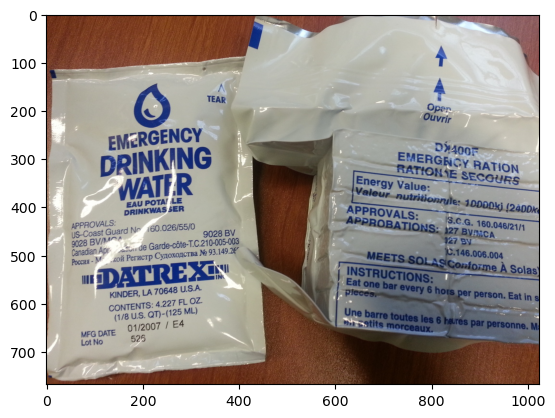

In [23]:
visualize_random_image("validation")

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

def visualize_many(from_num, to_num, dataset):
    dataset_path = data_path_train if dataset == 'train' else data_path_validation if dataset == 'validation' else 0
    if dataset == 0:
        raise Exception("invalid input parameter, must be either train or validation")
    images_paths = glob.glob(dataset_path)

    columns = 4
    rows = 5
    fig = plt.figure(figsize=(10, 10))

    index_counter = 1

    for i in range(from_num, to_num):
        counter = i
        image = images_paths[counter]
        img = mpimg.imread(image)
        fig.add_subplot(rows, columns, index_counter)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        index_counter += 1

    plt.tight_layout()  # Adjust the layout
    return fig

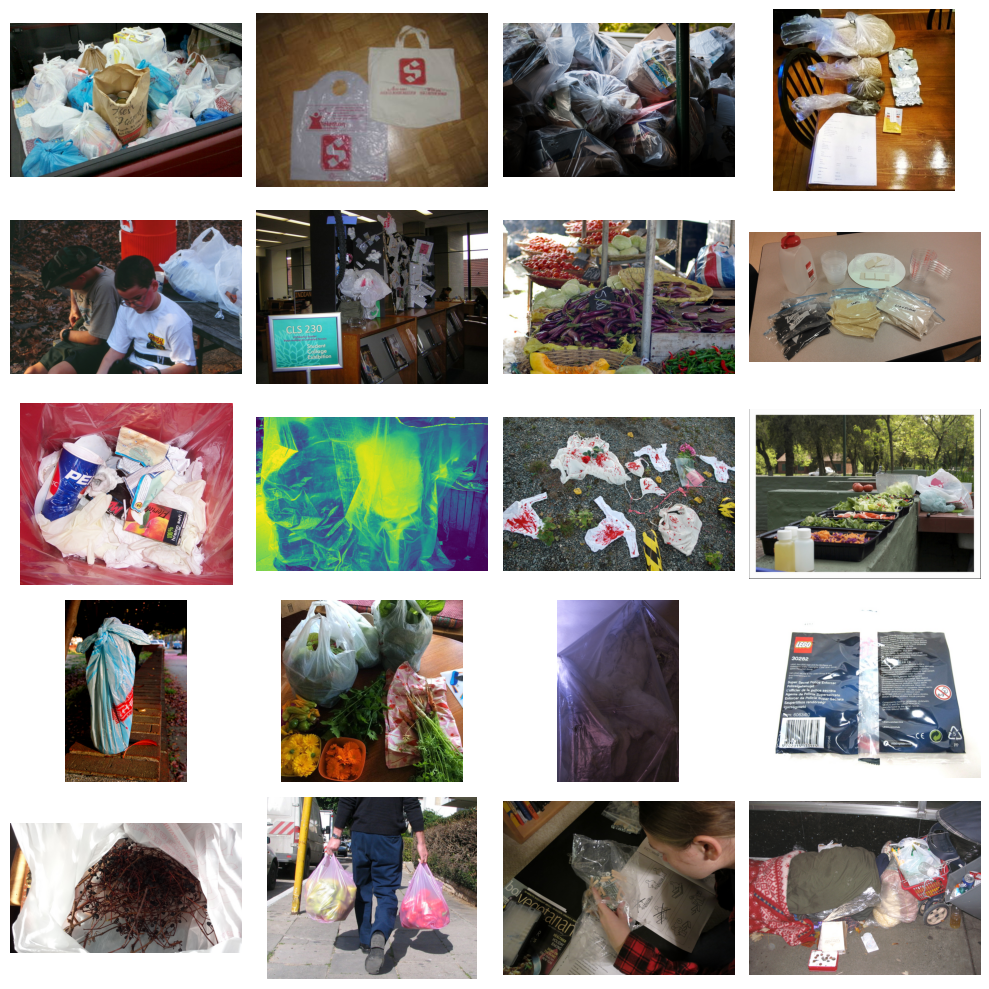

In [25]:
# Usage:
fig = visualize_many(0, 20, 'train')  # Assuming you want to display 20 images
plt.show()

In [26]:
val = df_validation.loc[(df_validation['ImageID'] == '488ab15e2780bec9') & (df_validation.LabelName == '/m/05gqfk' ) ]
val

ImageID  Source  LabelName  Confidence  XMin  XMax      YMin  \
86384  488ab15e2780bec9  xclick  /m/05gqfk           1   0.0   1.0  0.023599   

       YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  IsInside  
86384   1.0           0            0          1            0         0

In [27]:
validation_path

'/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/validation/data'

In [28]:
# Theory lesson

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

683 1024


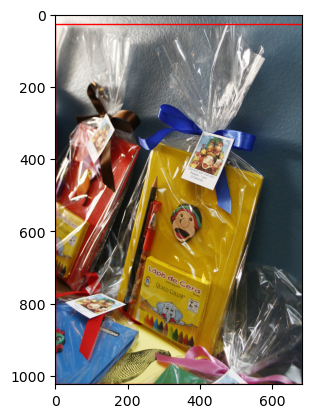

In [29]:
im = Image.open(f"{validation_path}/488ab15e2780bec9.jpg")

fig, ax = plt.subplots()

ax.imshow(im)

image_width, image_height = im.size
print(image_width, image_height)

xmin = float(val['XMin'].iloc[0])
xmax = float(val['YMax'].iloc[0])
ymin = float(val['YMin'].iloc[0])
ymax = float(val['YMax'].iloc[0])

xmin = xmin * image_width
xmax = xmax * image_width
ymin = ymin * image_height
ymax = ymax * image_height

width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth =1 , edgecolor = 'r', facecolor = 'none')

ax.add_patch(rect)
plt.show()

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [31]:
print(data_path_validation)
print(data_path_train)

/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/validation/data/*.jpg
/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/train/data/*.jpg


In [32]:
def visualize_images_with_boxes(images_paths, annotations_df, to_num=5):
    # Ensure to_num doesn't exceed 6 (maximum for 2x3 grid)
    to_num = min(6, to_num)
    
    columns = 3
    rows = 2
    fig = plt.figure(figsize=(15, 10))
    
    # Get unique image IDs that have the specific label
    unique_image_ids = list(annotations_df['ImageID'].unique())
    
    # Randomly select images
    if len(unique_image_ids) > to_num:
        selected_image_ids = random.sample(unique_image_ids, to_num)
    else:
        selected_image_ids = unique_image_ids
    
    for idx, image_id in enumerate(selected_image_ids, 1):
        # Find the corresponding image path
        matching_paths = [p for p in images_paths if image_id in p]
        if not matching_paths:
            continue
            
        image_path = matching_paths[0]
        
        # Load and display image
        im = Image.open(image_path)
        ax = fig.add_subplot(rows, columns, idx)
        ax.imshow(im)
        ax.axis('off')
        
        # Get image dimensions
        image_width, image_height = im.size
        
        # Get annotations for this image
        img_annotations = annotations_df[annotations_df['ImageID'] == image_id]
        
        # Draw all bounding boxes for this image
        for _, box in img_annotations.iterrows():
            xmin = float(box['XMin']) * image_width
            xmax = float(box['XMax']) * image_width
            ymin = float(box['YMin']) * image_height
            ymax = float(box['YMax']) * image_height
            
            width = xmax - xmin
            height = ymax - ymin
            
            rect = patches.Rectangle(
                (xmin, ymin), 
                width, 
                height, 
                linewidth=2,
                edgecolor='r',
                facecolor='none'
            )
            ax.add_patch(rect)
    
    plt.tight_layout()
    return fig

In [33]:
# First, filter the DataFrame for the specific LabelName
filtered_df = df_train[df_train['LabelName'] == '/m/05gqfk']

# Get the list of image paths
images_paths = glob.glob(data_path_train)  # or data_path_train for training data

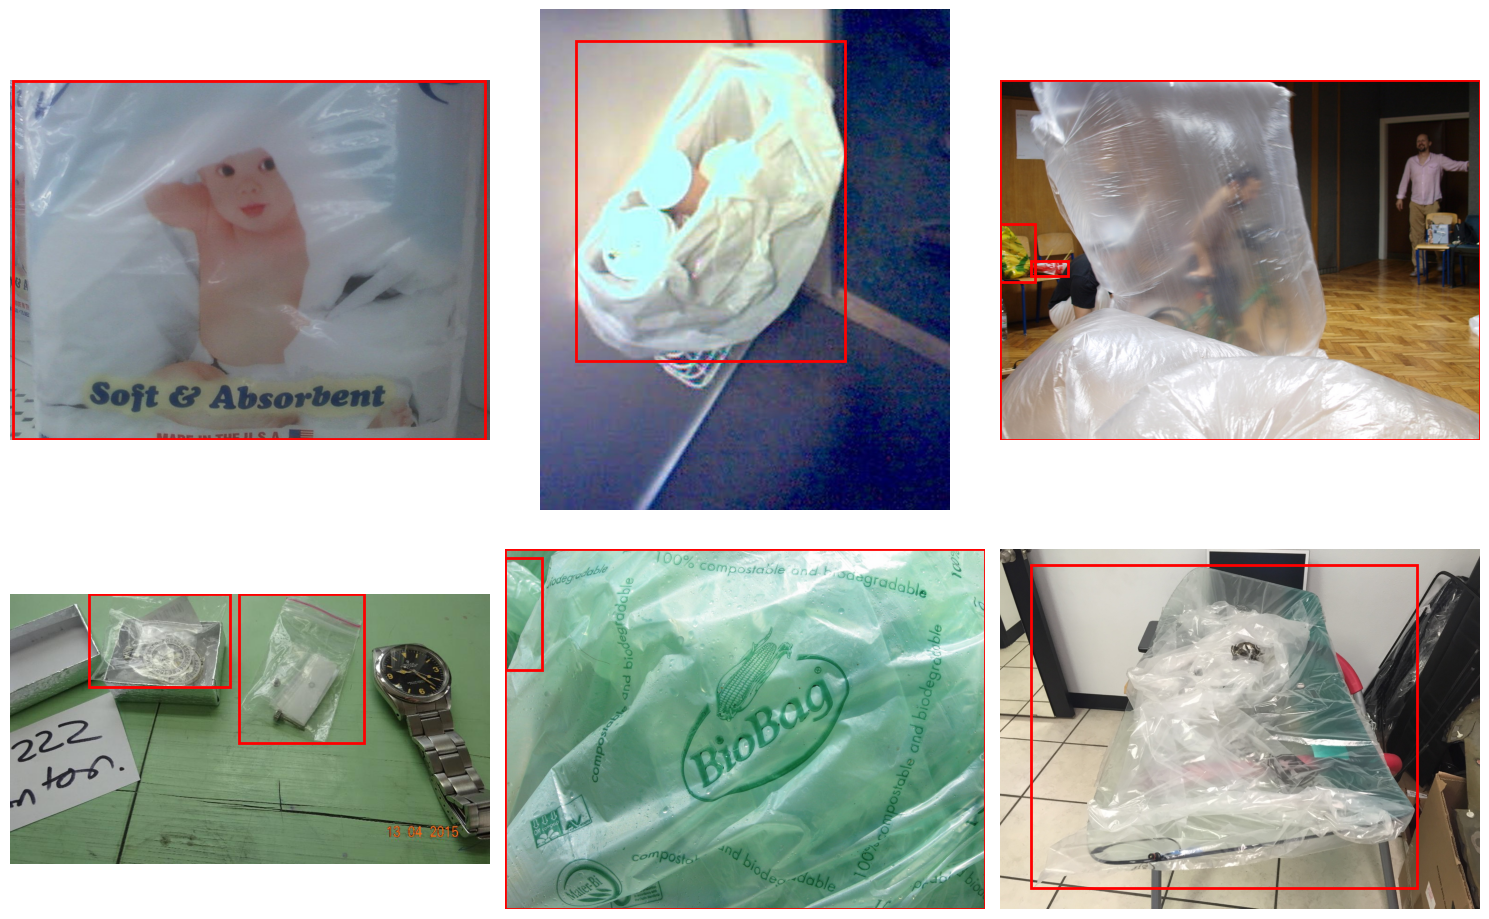

In [41]:
# Now call the function
fig = visualize_images_with_boxes(images_paths, filtered_df, to_num=10)
plt.show()

In [35]:
print(len(df_train))
print(len(df_validation))

14610229
303980


In [38]:
def clean_dataframe(df_for_train, df_for_validation):
    df_train_cleansed = df_for_train[df_for_train['LabelName'].str.contains('/m/05gqfk')]
    df_validation_cleansed = df_for_validation[df_for_validation['LabelName'].str.contains('/m/05gqfk')]

    return df_train_cleansed, df_validation_cleansed
    

In [39]:
df_train_cleansed, df_validation_cleansed = clean_dataframe(df_train, df_validation)

In [40]:
len(df_train_cleansed)

986

In [42]:
len(df_validation_cleansed)

9

In [43]:
df_train_cleansed

ImageID  Source  LabelName  Confidence      XMin      XMax  \
8282      0005a922e055c723  xclick  /m/05gqfk           1  0.000000  0.999375   
8733      000610ca2148a5ec  xclick  /m/05gqfk           1  0.163227  0.811445   
10247     00075e339f3d4f37  xclick  /m/05gqfk           1  0.017578  0.999023   
12496     00097c09aca0cabf  xclick  /m/05gqfk           1  0.112000  0.634000   
40914     002c60d5fbc94244  xclick  /m/05gqfk           1  0.375000  0.461250   
...                    ...     ...        ...         ...       ...       ...   
14525006  fe4b9d8d0eab74a6  xclick  /m/05gqfk           1  0.451562  0.621094   
14577519  ff58508650906267  xclick  /m/05gqfk           1  0.106771  0.721354   
14578273  ff5bc2ace3cdd410  xclick  /m/05gqfk           1  0.182031  0.503906   
14578274  ff5bc2ace3cdd410  xclick  /m/05gqfk           1  0.484375  0.794531   
14595845  ffb8d5536f78359e  xclick  /m/05gqfk           1  0.000000  0.293750   

              YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  \
8282      0.000000  0.998889           0            1  ...            0   
8733      0.051875  0.936875           0            0  ...            0   
10247     0.000000  0.998529           0            1  ...            0   
12496     0.000000  0.909414           1            1  ...            0   
40914     0.646993  0.772829           0            0  ...            0   
...            ...       ...         ...          ...  ...          ...   
14525006  0.562500  0.762500           0            0  ...            0   
14577519  0.093750  0.873047           0            0  ...            0   
14578273  0.196289  0.707031           1            0  ...            0   
14578274  0.218750  0.805664           0            0  ...            0   
14595845  0.000000  0.531132           0            1  ...            0   

          IsInside  XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  \
8282             0  0.546875  0.700000  0.000000  0.999375  0.000000   
8733             0  0.740150  0.163227  0.811445  0.811445  0.051875   
10247            0  0.263672  0.999023  0.516602  0.017578  0.000000   
12496            0  0.355000  0.634000  0.325000  0.112000  0.000000   
40914            0  0.433125  0.375000  0.461250  0.457500  0.646993   
...            ...       ...       ...       ...       ...       ...   
14525006         0  0.557031  0.451562  0.621094  0.474219  0.562500   
14577519         0  0.630208  0.106771  0.205729  0.721354  0.093750   
14578273         0  0.294531  0.182031  0.503906  0.328906  0.196289   
14578274         0  0.532813  0.794531  0.690625  0.484375  0.218750   
14595845         0  0.182500  0.000000  0.145000  0.293750  0.000000   

          XClick2Y  XClick3Y  XClick4Y  
8282      0.998889  0.000000  0.593333  
8733      0.161250  0.936875  0.936875  
10247     0.107353  0.998529  0.385294  
12496     0.390764  0.909414  0.600355  
40914     0.755011  0.766147  0.772829  
...            ...       ...       ...  
14525006  0.753125  0.687500  0.762500  
14577519  0.210938  0.873047  0.777344  
14578273  0.372070  0.292969  0.707031  
14578274  0.488281  0.805664  0.377930  
14595845  0.249057  0.531132  0.126415  

[986 rows x 21 columns]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train, test = train_test_split(df_train_cleansed, test_size = 0.2, random_state = 42)

In [46]:
train

ImageID     Source  LabelName  Confidence      XMin  \
10807483  b9176db9b1661faa     xclick  /m/05gqfk           1  0.231111   
3193099   3435faef2c5ccd6a  activemil  /m/05gqfk           1  0.005625   
13211126  e39390cebf26f22c     xclick  /m/05gqfk           1  0.213867   
6702608   711d64cd98b9be73     xclick  /m/05gqfk           1  0.000000   
5729014   60516e61f76f6ebf     xclick  /m/05gqfk           1  0.245833   
...                    ...        ...        ...         ...       ...   
436203    05642dbfac7ae5b0     xclick  /m/05gqfk           1  0.222656   
2105961   216da3e31dfbb78d     xclick  /m/05gqfk           1  0.552500   
12289483  d2e1237d3c2846e9     xclick  /m/05gqfk           1  0.486250   
5017725   53ef69782bdc1d63     xclick  /m/05gqfk           1  0.378019   
423059    05307e6f3f7d7daf     xclick  /m/05gqfk           1  0.261250   

              XMax      YMin      YMax  IsOccluded  IsTruncated  ...  \
10807483  0.502222  0.540000  0.652500           0            0  ...   
3193099   0.990000  0.001667  0.995833          -1           -1  ...   
13211126  0.742188  0.101562  0.643229           0            0  ...   
6702608   0.999167  0.000000  0.998750           0            1  ...   
5729014   0.465000  0.740625  0.887500           1            0  ...   
...            ...       ...       ...         ...          ...  ...   
436203    0.994531  0.203125  0.970833           1            1  ...   
2105961   0.796250  0.429167  0.721667           1            0  ...   
12289483  0.693750  0.450281  0.999062           1            1  ...   
5017725   0.983092  0.048128  0.907308           1            1  ...   
423059    0.999375  0.131653  0.999066           1            1  ...   

          IsDepiction  IsInside  XClick1X  XClick2X  XClick3X  XClick4X  \
10807483            0         0  0.373333  0.231111  0.275556  0.502222   
3193099            -1        -1 -1.000000 -1.000000 -1.000000 -1.000000   
13211126            0         0  0.591797  0.256836  0.213867  0.742188   
6702608             0         0  0.348333  0.000000  0.316667  0.999167   
5729014             0         0  0.320833  0.245833  0.425833  0.465000   
...               ...       ...       ...       ...       ...       ...   
436203              0         0  0.558594  0.222656  0.471094  0.994531   
2105961             0         0  0.648750  0.552500  0.676250  0.796250   
12289483            0         0  0.635000  0.693750  0.486250  0.530000   
5017725             0         0  0.670290  0.378019  0.594203  0.983092   
423059              0         0  0.865625  0.261250  0.553125  0.999375   

          XClick1Y  XClick2Y  XClick3Y  XClick4Y  
10807483  0.540000  0.587500  0.652500  0.587500  
3193099  -1.000000 -1.000000 -1.000000 -1.000000  
13211126  0.101562  0.119792  0.643229  0.572917  
6702608   0.000000  0.831250  0.998750  0.906250  
5729014   0.740625  0.887500  0.882500  0.740625  
...            ...       ...       ...       ...  
436203    0.203125  0.380208  0.970833  0.598958  
2105961   0.429167  0.540833  0.721667  0.606667  
12289483  0.450281  0.503752  0.999062  0.999062  
5017725   0.048128  0.324421  0.907308  0.631016  
423059    0.131653  0.897292  0.999066  0.682540  

[788 rows x 21 columns]

In [47]:
test

ImageID  Source  LabelName  Confidence      XMin      XMax  \
8043647   888fea91e5a0e984  xclick  /m/05gqfk           1  0.293125  0.601875   
5494785   5c3a12529a5afe93  xclick  /m/05gqfk           1  0.000000  0.998438   
10048712  abd0b8f885cadc1e  xclick  /m/05gqfk           1  0.675000  0.989583   
5040124   544ee383a0319bfa  xclick  /m/05gqfk           1  0.000000  0.999375   
2147024   221dd6f9138951a7  xclick  /m/05gqfk           1  0.595625  0.766875   
...                    ...     ...        ...         ...       ...       ...   
1104154   102e5834dbf0b1cc  xclick  /m/05gqfk           1  0.528125  0.662500   
5995456   64f1b54aa2f25853  xclick  /m/05gqfk           1  0.683750  0.998750   
135411    011c2e4461eb1fdc  xclick  /m/05gqfk           1  0.306836  0.998410   
9872849   a8b17d203d9eea1a  xclick  /m/05gqfk           1  0.125000  0.181667   
14145224  f6a61b3b167cbbbc  xclick  /m/05gqfk           1  0.527500  0.905000   

              YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  \
8043647   0.196998  0.910882           1            0  ...            0   
5494785   0.233333  0.997917           1            1  ...            0   
10048712  0.580469  0.891406           1            0  ...            0   
5040124   0.000000  0.999074           1            1  ...            0   
2147024   0.431265  0.542812           1            0  ...            0   
...            ...       ...         ...          ...  ...          ...   
1104154   0.613333  0.728333           1            0  ...            0   
5995456   0.000000  0.335000           1            1  ...            0   
135411    0.152500  0.998750           1            1  ...            0   
9872849   0.466250  0.661250           0            0  ...            0   
14145224  0.410000  0.980000           0            0  ...            0   

          IsInside  XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  \
8043647          0  0.378750  0.293125  0.601875  0.423750  0.196998   
5494785          0  0.328125  0.000000  0.846875  0.998438  0.233333   
10048712         0  0.806250  0.675000  0.728125  0.989583  0.580469   
5040124          0  0.347500  0.000000  0.999375  0.891875  0.000000   
2147024          0  0.696875  0.595625  0.621875  0.766875  0.431265   
...            ...       ...       ...       ...       ...       ...   
1104154          0  0.538125  0.528125  0.586250  0.662500  0.613333   
5995456          0  0.760000  0.683750  0.892500  0.998750  0.000000   
135411           0  0.995231  0.998410  0.833068  0.306836  0.152500   
9872849          0  0.160000  0.125000  0.128333  0.181667  0.466250   
14145224         0  0.626875  0.527500  0.553750  0.905000  0.410000   

          XClick2Y  XClick3Y  XClick4Y  
8043647   0.405253  0.575985  0.910882  
5494785   0.564583  0.997917  0.497917  
10048712  0.697656  0.891406  0.860938  
5040124   0.539815  0.179630  0.999074  
2147024   0.500393  0.542812  0.500393  
...            ...       ...       ...  
1104154   0.633333  0.728333  0.692500  
5995456   0.000000  0.335000  0.098333  
135411    0.682500  0.998750  0.547500  
9872849   0.468750  0.661250  0.658750  
14145224  0.965000  0.980000  0.820000  

[198 rows x 21 columns]

In [48]:
import os.path
from os import path

In [52]:
path = f"{home}/user-default-efs/ml-pipeline-SM/testImages"
os.mkdir(path)

In [53]:
path = f"{home}/user-default-efs/ml-pipeline-SM/testImages/data"
os.mkdir(path)

In [63]:
test_ids = test["ImageID"].values.tolist()

In [64]:
test_ids

['888fea91e5a0e984',
 '5c3a12529a5afe93',
 'abd0b8f885cadc1e',
 '544ee383a0319bfa',
 '221dd6f9138951a7',
 '813cc9497ec70c3e',
 'a362885191c900fc',
 '2a96abf3c061a5c6',
 'a8b17d203d9eea1a',
 '614a6b3531b9f0dc',
 '3a2db7dc347bdf0e',
 '82bd4b9f80e26e93',
 '8fb537cba18a84ca',
 'd90ebe9f88733eb1',
 '28b41d02eb81564c',
 '017f439639163703',
 '443f4ba10b3e5d1a',
 '9e6c0bf0dbb867fe',
 'b653102b27810f40',
 '05642dbfac7ae5b0',
 '079cab48c40308b5',
 '017f439639163703',
 'ce7cfd783170bc45',
 '1062690a06582845',
 '9b5f296f02da2dcf',
 '614a6b3531b9f0dc',
 '51bae1d112045cfe',
 '404d92e51549f991',
 '024db73fefb53bad',
 '294d9606656083bf',
 '0345e899cc440fde',
 '01381a0300454d75',
 '51bae1d112045cfe',
 '1754ef217b782df7',
 'd08d97d4b69bc3d6',
 '117c1b9b9eb85223',
 '404d92e51549f991',
 '00839c7e26f5c5e0',
 '00a76046606aa888',
 '60516e61f76f6ebf',
 '216da3e31dfbb78d',
 '0b5f8c885d7acd4f',
 '8262446ae6aa7cbb',
 '25321d2bdf1cc5bc',
 '614a6b3531b9f0dc',
 '8f155f6394d1d6cd',
 '9b5f296f02da2dcf',
 '60516e61f76

In [65]:
len(test_ids)

198

In [66]:
train_ids = train['ImageID'].values.tolist()

In [68]:
len(train_ids)

788

In [69]:
home

'/home/sagemaker-user'

In [70]:
import os
import shutil

In [71]:

# Source directory containing all images
source_dir = '/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/train/data'

# Destination directories
train_dest = '/home/sagemaker-user/user-default-efs/ml-pipeline-SM/testImages/data/train'
test_dest = '/home/sagemaker-user/user-default-efs/ml-pipeline-SM/testImages/data/test'

In [72]:
# Create destination directories if they don't exist
os.makedirs(train_dest, exist_ok=True)
os.makedirs(test_dest, exist_ok=True)

In [73]:

# Copy train images
for image_id in train_ids:
    source_file = os.path.join(source_dir, f"{image_id}.jpg")
    dest_file = os.path.join(train_dest, f"{image_id}.jpg")
    if os.path.exists(source_file):
        shutil.copy2(source_file, dest_file)
    else:
        print(f"Warning: Source file not found - {source_file}")

In [74]:
# Copy test images
for image_id in test_ids:
    source_file = os.path.join(source_dir, f"{image_id}.jpg")
    dest_file = os.path.join(test_dest, f"{image_id}.jpg")
    if os.path.exists(source_file):
        shutil.copy2(source_file, dest_file)
    else:
        print(f"Warning: Source file not found - {source_file}")

print("Copy operation completed!")

Copy operation completed!


In [75]:
import os

# Directories to check
train_dest = '/home/sagemaker-user/user-default-efs/ml-pipeline-SM/testImages/data/train'
test_dest = '/home/sagemaker-user/user-default-efs/ml-pipeline-SM/testImages/data/test'

# Verify train images
print("Verifying train images...")
train_files_copied = 0
train_files_missing = []
for image_id in train_ids:
    expected_file = os.path.join(train_dest, f"{image_id}.jpg")
    if os.path.exists(expected_file):
        train_files_copied += 1
    else:
        train_files_missing.append(image_id)

# Verify test images
print("Verifying test images...")
test_files_copied = 0
test_files_missing = []
for image_id in test_ids:
    expected_file = os.path.join(test_dest, f"{image_id}.jpg")
    if os.path.exists(expected_file):
        test_files_copied += 1
    else:
        test_files_missing.append(image_id)

# Print results
print("\nResults:")
print(f"Train images: {train_files_copied}/{len(train_ids)} copied successfully")
print(f"Test images: {test_files_copied}/{len(test_ids)} copied successfully")

if train_files_missing:
    print(f"\nMissing train images ({len(train_files_missing)}):")
    print(train_files_missing)

if test_files_missing:
    print(f"\nMissing test images ({len(test_files_missing)}):")
    print(test_files_missing)

Verifying train images...
Verifying test images...

Results:
Train images: 788/788 copied successfully
Test images: 198/198 copied successfully
